In [1]:
##### IMPORTS ####
import random, requests, os, matplotlib.pyplot as plt, cryptography_functions

### LET USER INPUT TEXT FILE NAME ####

In [2]:
#### FINDING FILE IN DIRECTORY ####

def find_file():
    in_directory = False

    while in_directory == False:
        file_name = input("Input the name of the text file you would like to encrypt / decrypt, including the .txt: ")
        if os.path.isfile(file_name):
            in_directory = True
        else:
            print("")
            print("The file you inputted is not in the directory, try again")
          
    return file_name

In [3]:
#### CASESAR CYPHER ##### (maintains case of characters)

def caesar_encrypt(): #defines the caesar encryption function
    
    file_name = find_file()

    input_text = open(file_name,"r") #opens the text file we want to read
    message = input_text.read() #reads the text file to the variable message
    
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    
    shift_value_file = open("_caesar_shift_value.txt","w")
    shift_value = random.randint(1,26) #generates a shift value between 1 and 26 inclusive
    
    encrypted_message = []
    
    for character in message: #iterates character through each element of the message
        if character.isalpha(): #checks to see if the character is in the alphabet
            
            if character.isupper(): #checks to see if character is uppercase
                offset = 65 #sets appropriate offset value
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25

            encrypted_message.append(chr((character_offset+shift_value)%26+offset))
            #appends our changed letter to the encrypted message list
    

    final_text = "".join(encrypted_message) #turns the list into a string
    encrypted_text.write(final_text) #writes the string to the text file
    shift_value_file.write(str(shift_value))
    shift_value_file.close()
    encrypted_text.close()
    print("")
    print("Encrypted message written to encrypted_text.txt")
    input_text.close() #closes the files
    
    return 


In [4]:
def caesar_decrypt(): #needs a shift value to decrypt 
    
    file_name = find_file() #lets the user input the file name they would like to read
    
    shift_value_file = open("_caesar_shift_value.txt","r") #opens the shift value file
    shift_value = int(shift_value_file.read()) #read the integer value stored there
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    

    decrypted_message = []
       
    for character in cryptic: #iterates each character in the cryptic text
        if character.isalpha(): #checks if character is in alphabet
            
            if character.isupper(): #checks if character is uppercase
                offset = 65 #sets appropriate offset
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25
            
            decrypted_message.append(chr((character_offset-shift_value)%26+offset))
            #appends decrypted character to decrypted message list
    
    
        
    final_text = "".join(decrypted_message) #changes the list into a string
    decrypted_text.write(final_text) #writes the string to the text file
    
    decrypted_text.close()  
    encrypted_text.close()#closes the files
    print("")
    print("Decrypted message written to decrypted_text.txt")
    
    return 

In [5]:
#caesar_encrypt()

In [6]:
#caesar_decrypt()

In [7]:
#### VIGENERE CYPHER ####
def vigenere_encrypt():
    
    file_name = find_file()
    
    input_text = open(file_name,"r") #opens the text file we want to read
    message_list_unfiltered = list(input_text.read()) #reads the text file to the variable message
    message_list = [x for x in message_list_unfiltered if x.isalpha()] #makes a list of only alphabetical characters
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    key_file = open("_vigenere_key.txt","w")
   
    
    encrypted_message = []
    key_length = random.randint(129,384) #generates a random length for our keyword
    
    key_list = [random.randint(0,25) for x in range(0,key_length)] #generates a list for our keyword in ASCII
    
    for i in range(0,len(message_list)):

        key_pos =  i%len(key_list) #generates position of where we are in the key
        

        character = message_list[i] #sets character to message character for ease
        if character.isupper(): #checks if y is uppercase in the alphabet
            offset = 65 #sets ASCII offsets
        else: offset = 97

        character_offset = ord(character) - offset #offsets character to be within 0 and 25

        character_encrypted = (character_offset+key_list[key_pos])%26 + offset #encrypts the character 

        encrypted_message.append(chr(character_encrypted)) #appends encrypted character to encrypted message
       
    final_text = "".join(encrypted_message)
    encrypted_text.write(final_text) #writes the final encrypted message to the file
    
    key = "".join(chr(m+65) for m in key_list) #turns keylist into a string
    key_file.write(key) #writes the key to the file
    
    
    encrypted_text.close()
    input_text.close() #closes the files
    key_file.close()
    
    print("Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt")
    
    return      

In [21]:
def vigenere_decrypt():
    
    file_name = find_file()
    
    key_file = open("_vigenere_key.txt","r") #opens file with key in it to read
    key = key_file.read() #reads the file to key
    key_list = [ord(m) - 65 for m in key] #offsets all values of key to be between 0 and 25
    
    encrypted_text = open(file_name,"r") #opens encrypted text file to read
    cryptic = encrypted_text.read() #reads the file to cryptic
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to
    decrypted_message = [] #creates decrypted message list
  
    for i in range(0,len(cryptic)): #iterates through the encrypted message
        character = cryptic[i] #sets character to the current character
        key_pos = i%len(key_list) #sets our position within the key 
        
        if character.isupper(): #checks to see if the character is uppercase
            offset = 65 #sets appropriate offset value
        else:
            offset = 97
            
        character_offset = ord(character)-offset #offsets character to be between 0 and 25
        
        character_decrypted = (character_offset-key_list[key_pos])%26 + offset
        #decrypts the character using the keyword
        
        decrypted_message.append(chr(character_decrypted)) #appends character to decrypted message
        
    final_text = "".join(decrypted_message) #turns decrypted message into a string
    decrypted_text.write(final_text) #writes this string to the decrypted text file
    
    decrypted_text.close() #closes the files
    encrypted_text.close()
    key_file.close()
    return
    
    
    

In [22]:
vigenere_encrypt()

Input the name of the text file you would like to encrypt / decrypt, including the .txt: message_treasure_island.txt
Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt


In [10]:
vigenere_decrypt()

In [11]:
#### URL TEXT EXTRACTING ####
def url_to_text_utf8(url):  #### Sourced code from the GitHub repo provided for this project
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url) #gets the URL of the text file
    response.encoding = 'utf-8-sig' #encodes the text file
    return response.text #returns the text file
           
def get_large_text():        
    wonderland = url_to_text_utf8("https://gutenberg.org/cache/epub/11/pg11.txt")[1490:148820]
    gatsby = url_to_text_utf8("https://gutenberg.org/cache/epub/64317/pg64317.txt")[1497:278020]
    dracula = url_to_text_utf8("https://gutenberg.org/cache/epub/345/pg345.txt")[3130:860610]
    moby = url_to_text_utf8("https://gutenberg.org/cache/epub/2701/pg2701.txt")[6000:1241690]
    frankenstein = url_to_text_utf8("https://gutenberg.org/cache/epub/84/pg84.txt")[1440:427680]
    #creates large strings of texts from english books for analysis later

    text = wonderland + gatsby + dracula + moby + frankenstein
    return text

    #text gives us approximately 3 million characters to analyse (not all may be alphabet though most all are)


In [12]:
def frequency_finder(text):
    descending_frequencies = open("decsending_frequent_letters.txt","w")
    counts = {chr(x):0 for x in range(65,91)} #creates a dictionary of all the letters in the alphabet with value 0
    text = text.upper() #makes all text uppercase
    for character in text: #iterates through all the elements of the string "text"
        if character in counts: #checks if the element is an alphabet letter
            counts[character]+=1 #ups the count by one for each letter
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
    frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
    descending_frequencies.write("".join(frequency))
    descending_frequencies.close()
    return frequency

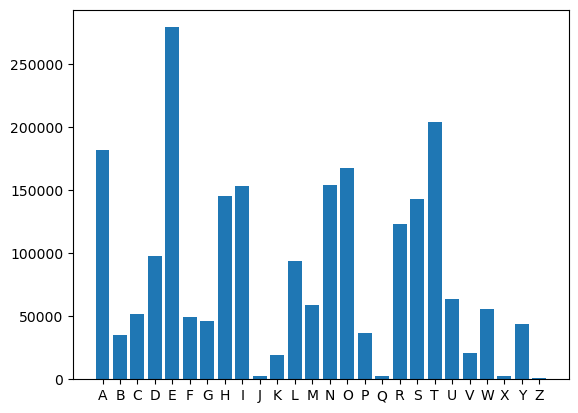

In [13]:
#### GET FREQUENCY OF LETTERS IN ENGLISH LANGUAGE, WRITE TO FILE IN DESCENDING ORDER ####
text = get_large_text()
counts = {chr(x):0 for x in range(65,91)}
text = text.upper()
for character in text:
    if character in counts:
        counts[character]+=1

letters = list(counts.keys())
appearances = list(counts.values())
plt.bar(range(len(counts)),appearances,tick_label=letters)

plt.show() #shows graph of letter frequencies 

descending_frequencies = open("decsending_frequent_letters.txt","w")
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
descending_frequencies.write("".join(frequency))
descending_frequencies.close() #writes the most frequent letters in descending order to the file



In [15]:
##### CAESAR CYPHER BREAK VIA FREQUENCY ANALYSIS ####

def caesar_frequency_break():
    
    #DONT NEED TO RUN FREQUENCY ANALYSIS EVERY TIME, WRITE TO TEXT FILE
    file_name = find_file()
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to  
    
    frequent_letters = open("decsending_frequent_letters.txt","r")    
    frequency_list = list(frequent_letters.read()) #gets the list of the most frequent letters in descending order
    
  
    
    
    
    message_most_frequent = frequency_finder(cryptic)[0] #finds the most frequent letter in the encrypted message
    
    correctness = False 
    while correctness == False: #iterates until plaintext is found
        for i in range(0,len(frequency_list)):
            decrypted_message = []
            
            shift_value = ord(message_most_frequent) - ord(frequency_list[i]) 
            #finds the shift value with corresponding letter of frequency list 
            
            for character in cryptic: #iterates each character in the cryptic text
                if character.isalpha(): #checks if character is in alphabet

                    if character.isupper(): #checks if character is uppercase
                        offset = 65 #sets appropriate offset
                    else:
                        offset = 97

                    character_offset = ord(character)-offset #offsets character to be between 0 and 25

                    decrypted_message.append(chr((character_offset-shift_value)%26+offset))
                    #appends decrypted character to decrypted message list
            print("".join(decrypted_message))
            print("")
            x = input("Does this look like plaintext? Press enter if so, type anything else if not: ")
            if x == "":
                correctness = True
                print("")
                print("Plaintext written to decrypted_text.txt")
                break
            else:
                continue
    decrypted_text.write("".join(decrypted_message)) #writes the plaintext to decrypted_text
    decrypted_text.close()
    encrypted_text.close()
    frequent_letters.close() #closes the files
    return
    
    

In [26]:
caesar_encrypt()
caesar_frequency_break()

Input the name of the text file you would like to encrypt / decrypt, including the .txt: message_treasure_island.txt

Encrypted message written to encrypted_text.txt
Input the name of the text file you would like to encrypt / decrypt, including the .txt: message_treasure_island.txt
SQUIRETRELAWNEYDrLiveseyandtherestofthesegentlemenhavingaskedmetowritedownthewholeparticularsaboutTreasureIslandfromthebeginningtotheendkeepingnothingbackbutthebearingsoftheislandandthatonlybecausethereisstilltreasurenotyetliftedItakeupmypenintheyearofgraceandgobacktothetimewhenmyfatherkepttheAdmiralBenbowinnandthebrownoldseamanwiththesabrecutfirsttookuphislodgingunderourroofIrememberhimasifitwereyesterdayashecameploddingtotheinndoorhisseachestfollowingbehindhiminahandbarrowatallstrongheavynutbrownmanhistarrypigtailfallingovertheshoulderofhissoiledbluecoathishandsraggedandscarredwithblackbrokennailsandthesabrecutacrossonecheekadirtylividwhiteIrememberhimlookingroundthecoveandwhistlingtohimselfashedidsoandthe

Does this look like plaintext? Press enter if so, type anything else if not: 

Plaintext written to decrypted_text.txt


In [27]:
#### TURN VIGENERE KEY INTO NUMBERS ####
 ## SPLIT KEY FIRST, RETURN TUPLE OF SPLIT KEY
def key_to_tuple():
    key_file = open("_vigenere_key.txt","r") #opens the vigenere key file
    key = key_file.read() #reads the vigenere key to key

    num_of_splits = len(key)//64 #gets the quotient of the key length when dividing by 64 to find out our splits
    split_key = []
    for i in range(0,num_of_splits+1): #iterates through splits
        key_num_list = [] #creates a list for our number key
        for character in range(64*i,64*(i+1)): #iterates through all characters of that split
            if character == len(key): #makes sure not to go out of the range of the string
                break
            key_num_list.append(str(ord(key[character])))#appends the string value of the ASCII value of the character

        key_num_str = "".join(key_num_list) #turns the list into a long string
        key_num = int(key_num_str) #turns the string into an integer
        split_key.append(key_num)#applies the split key to the big list
  
    return tuple(split_key)

key_to_tuple()
# EVERY 2 DIGITS REPRESENTS ONE OF THE LETTERS OF OUR KEY

(83848088878174668788806876868979808667686886857267777672687787718990676978827969728878828478768777848277758975837390668380887871,
 79736778827971767666708786777079848265888485717984798983677172747273797989777176737885707077706684678786678285818079707671836973,
 68897076798772737879888873856788787776737569896776819090688478798278876674778383877373767472658381668685888573868568688583848674,
 79718089748466668478667790868073867882686872896685907783756677787974708771898990697280837576887573897266697068837587898379758982,
 83836890878376856871737467877078907172796989686878879074788984768886827067897674837586679072708484909077698578769082797676657480,
 86747286878381836777758386747187837878847687657687737771687473658987718480668668776678)

In [28]:
#### RSA KEY GENERATOR ####

def RSA_key_generator(bitlength=1024): #can take 128 numbers with Bitlength of 1024
    """This will generate RSA keys. This is a version of the private key.
    The output is ((PublicKey), PrivateExp, Factorisation).
    The PublicKey can be published, PrivateExp is needed to decrypt.
    Factorisation is not needed, but must be kept secret."""
    ## Generate two large primes.
    p = cryptography_functions.random_prime(bitlength)
    q = cryptography_functions.random_prime(bitlength)
    N = p*q
    
    ## Next, get phi and use it to get a public and private exponent.
    phi = (p-1)*(q-1)
    ## Choose encryption exponent e randomly between 1 and p and q.
    e = random.randint(1,min(p,q))
    ## It must be coprime to phi though. We use rejection sampling again:    
    while cryptography_functions.gcd(e,phi) > 1:
        e = random.randint(1,min(p,q))
    
    ## Finally, get d using 'pow'
    ## (the extended Euclid's algorithm could do this too).
    d = pow(e,-1,phi)
    
    ## Then return the keys.
    return ((N,e),d%phi,{p:1,q:1})

In [32]:
def RSA_encrypt(N,e):
    encrypted_key_list=[]
    vigi_key_list = list(key_to_tuple())
    for element in vigi_key_list:
        i=pow(element,e,N)
        encrypted_key_list.append(i)
    """Encrypt an integer 'message' using RSA with public key (N,e)."""
    return tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1])
print(cipher)


#attempt at changing it
def RSA_encrypt(N,e,KEY_plural):
    encrypted_key_list=[]
    _key_list = list(KEY_plural)
    for element in vigi_key_list:
        i=pow(element,e,N)
        encrypted_key_list.append(i)
    """Encrypt an integer 'message' using RSA with public key (N,e)."""
    return tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1], key_to_tuple())
print(cipher)
tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1])
print(cipher)


(6517569479084228175159948429797254734293222154604564180354196763480689797727974223231856726707738257334297302118296590263501414421358548023138388218940137226291493080719159018742383713526267458959273457529011181429168530773858236834181453910665011319765956441802040013405375282656172029373080009928599236621638061018186550531732567284110414089208500506476865830864353652687123778777263390277938487736491873998314249374048425383387745394794386944014461023346880434588036854309116224569090110313022502562744461363972090215371283790908407437258127522436836986406567742784252196780310837750512823952255176614069356546419, 112508488761666725131460903992631018526108287657276572660617138654465388661419090147097777200015058933243585183495995318370582352039015108514172513415511371082462240317720269010971771278083050134794666004283140845026189499988882431696112531849104581612628817015978563699526159484643401785945387115479524696427079744422441454241105644214203879502123788035172296509577901429609840970

NameError: name 'vigi_key_list' is not defined

In [33]:
def RSA_decrypt(encrypted_key,N,d):
    complete_key=[]
    decryption_list=list(encrypted_key)
    for element in decryption_list:
        j=pow(element,d,N)
        complete_key.append(str(j))
    """Decrypt an integer message using RSA with public key (N,e) and private key (d, fact)."""
    return "".join(complete_key)

received_int = RSA_decrypt(cipher,public_key[0],d)

print(received_int)

4687694328775877827054316434516257947594410492399864837326403969365072636810606074904336858413376201001591651917959128758438717949617781942636002650796555942825129685885547014789039421559443021936769355184055451858515737880190883662119775700147340037164401757676540790308338260469090371330167805256192577170957204613884742154226825589537493863276730966601503392598780295819730797693035145766587626796281048995668273507972550647468085600638695621234129714976384553618708187476585739769231677132569541443692446567618388369895540583905953855402554384774838274429829062579164619483012116771826699517031226414812406394451161151395570603581347662842291676042407661487452748412285175808304531818457655969277909187022213143520168545759894269985479278330917394168230708423920164509463693458672501062897758009493224525631262892518641035039015276298770681496659528129951334995981620563484838325855545826101203277144262962105085219112465955291229707147109899916466440050842347868066420431187126957864406130418855

In [34]:
print(len("8678868975786684757371837574908171717884807067706983788273708868826974767772666782677988658883838688676675696866747472838985868370657690667386787588827288708780667774898573727980806566908868878768727981807589887875757090697368737176658670788785678190906586"))

256


In [35]:

print(len("86788689757866847573718375749081717178848070677069837882737088688269747677726667826779886588838386886766756968667474728389858683"))

128


In [36]:
from random import randint
from random import sample
import string
from itertools import permutations

ALPH_1 = string.ascii_lowercase

# round? = The return value is an integer

# create bigrams:



fr = {'a': 0.0813382530968154, 'b': 0.015772428180238454, 'c': 0.02307211235643865, 'd': 0.04378202350586753, 'e': 0.12486207836182597, 'f': 0.022079076561585642, 'g': 0.020784064969467386, 'h': 0.06501369165412156, 'i': 0.06853376455715428, 'j': 0.00125078732595071, 'k': 0.00849105910416825, 'l': 0.04209882113294529, 'm': 0.026337113986929273, 'n': 0.06876203324414029, 'o': 0.0749226075342068, 'p': 0.01639692842369527, 'q': 0.0012807168798216735, 'r': 0.05524995644579847, 's': 0.06410999781112219, 't': 0.09143076668795984, 'u': 0.028544753617232275, 'v': 0.00937018391040789, 'w': 0.024949633474642522, 'x': 0.0013084128848962963, 'y': 0.019657016246833945, 'z': 0.0006017180457341452}

#all_bigrams = []
 #   for c in ALPH_1:
  #      for d in ALPH_1:
   #         all_bigrams.append(c + d)
    
encode_dict = dict()

def bigrams(fr):

    global encode_dict
    all_bigrams = ["".join(pair) for pair in permutations(ALPH_1, 2)]
  #  su = []
    
    for key in fr:
        
        freq = fr[key]
        
        bi_quantity = round(650*freq)
        if bi_quantity == 0:
            bi_quantity = 1
        if bi_quantity > 50:
            bi_quantity -= 1
      
        storage = sample(all_bigrams, bi_quantity)
        
        all_bigrams = [bigram for bigram in all_bigrams if bigram not in storage]
        encode_dict[key]=storage
       
    return encode_dict

print (bigrams(fr))

{'a': ['fr', 'ux', 'gd', 'ah', 'qx', 'au', 'iw', 'du', 'eu', 'qs', 'pt', 'li', 'mq', 'ki', 'cr', 'aj', 'sz', 'xd', 'jy', 'hw', 'oh', 'gq', 'fe', 'wj', 'mh', 'ma', 'ne', 'hl', 'if', 'zg', 'uk', 'oj', 'iu', 'yq', 'tn', 'it', 'dx', 'dj', 'gt', 'hp', 'zo', 'id', 'pd', 'uc', 'ri', 'lg', 'mk', 'xs', 'ck', 'sd', 'dl', 'ts'], 'b': ['is', 'ix', 'on', 'ey', 'ik', 'fh', 'um', 'db', 'cu', 'ew'], 'c': ['yx', 'ue', 'xy', 'me', 'zw', 'pe', 'mx', 'zh', 'iq', 'na', 'ha', 'ps', 'le', 'lx', 'pr'], 'd': ['hv', 'up', 'ba', 'dk', 'jc', 'fm', 'sm', 'vd', 'mc', 'vg', 'tb', 'fp', 'pl', 'sa', 'by', 'ge', 'pw', 'ca', 'cy', 'ru', 'di', 'dw', 'sj', 'pz', 'zl', 'bp', 'bg', 'af'], 'e': ['eg', 'zr', 'ut', 'np', 'rs', 'so', 'fg', 'bx', 'xz', 'ks', 'hf', 'ao', 'ym', 'cl', 'rm', 'nt', 'js', 'qc', 'oe', 'px', 'vu', 'mv', 'jk', 'xr', 'jw', 'ie', 'ej', 'vj', 'nh', 'wb', 'as', 'ot', 'bm', 'vy', 'dg', 'yw', 'ly', 'oz', 'qi', 'kz', 'te', 'cv', 'hy', 'nk', 'vp', 'jd', 'kf', 'yc', 'ro', 'iz', 'wz', 'rf', 'hq', 'ed', 'lb', 'sl',

In [37]:
# second part of question 4 below

import string
ALPH_1 = string.ascii_lowercase

def char_to_byte(char): 
    """
    Returns the 8 bit binary representation (padded with 
    leading zeros when necessary) of ord(char), i.e. of 
    the order of the input character char. 
    """
    byte_string = bin(ord(char))[2:]            # The order of char as a binary string 
    num_zeros = 8 - len(byte_string)            # The number of zeros needed to pad out byte_string
    byte_string = '0' * num_zeros + byte_string # Now pad out byte_string with num_zeros many zeros
                                                # to obtain the 8-bit binary representation
    return byte_string  


#global encode_dict
# replace this dectionary wiht the dictionary we've made of 2grams

def int_form(key1):
    two_grams = encode_dict[key1] 
    y = "".join(two_grams)
    list = []
    list.append(' 1')
    binary = [char_to_byte(char) for char in y]
    biny = "".join(binary)
    list.append(biny)
    return "".join(list)

key = []
Vig = str(key_to_tuple()[0])
key.append(Vig)
for key2 in ALPH_1:
    item = int_form(key2)
    key.append(item)

key_final = "".join(key)
    
print(key_final)


83848088878174668788806876868979808667686886857267777672687787718990676978827969728878828478768777848277758975837390668380887871 10110011001110010011101010111100001100111011001000110000101101000011100010111100001100001011101010110100101110111011001000111010101100101011101010111000101110011011100000111010001101100011010010110110101110001011010110110100101100011011100100110000101101010011100110111101001111000011001000110101001111001011010000111011101101111011010000110011101110001011001100110010101110111011010100110110101101000011011010110000101101110011001010110100001101100011010010110011001111010011001110111010101101011011011110110101001101001011101010111100101110001011101000110111001101001011101000110010001111000011001000110101001100111011101000110100001110000011110100110111101101001011001000111000001100100011101010110001101110010011010010110110001100111011011010110101101111000011100110110001101101011011100110110010001100100011011000111010001110011 1011010010111001101101001011110000110

In [38]:
def prep_for_RSA(string_input,segment_len):
    string= [string_input[i:i+segment_len]for i in range(0,len(string_input), segment_len)]
    if len(string) == 40:
        return string
    else:
        last_two = [string[39], string[40]]
        string.remove(string[40])
        string[39] = "".join(last_two)
        return string
    
eights = prep_for_RSA(key_final, len(key_final)//40)
print(eights)
#len(eights)

['83848088878174668788806876868979808667686886857267777672687787718990676978827969728878828478768777848277758975837390668380887871 101100110011100100111010101111000011001110110010001100001011010000111000101111000011000010111010101101001011101110110010001110101011001', '010111010101110001011100110111000001110100011011000110100101101101011100010110101101101001011000110111001001100001011010100111001101111010011110000110010001101010011110010110100001110111011011110110100001100111011100010110011001100101011101110110101001101101011010', '000110110101100001011011100110010101101000011011000110100101100110011110100110011101110101011010110110111101101010011010010111010101111001011100010111010001101110011010010111010001100100011110000110010001101010011001110111010001101000011100000111101001101111011010', '01011001000111000001100100011101010110001101110010011010010110110001100111011011010110101101111000011100110110001101101011011100110110010001100100011011000111010001110011 10110100101110011011010

In [42]:
 we need to rsa encrypt all these integers and send them in a list called the public key -> ben now
    we also need to send the message which is encrypted wiht the 2grams and vig
    and send it

SyntaxError: invalid syntax (3843624939.py, line 1)

In [39]:
import random
import string
ALPH_1 = string.ascii_lowercase

message_file = open("message_treasure_island.txt", "r")
message = message_file.read()

def bigram_message(message):
    bigrams = []
    for letter in message:
        if letter in ALPH_1:
            x = encode_dict[letter][random.randint(0, len(encode_dict[letter])-1)]
            bigrams.append(x)
    message = "".join(bigrams)
    return message

print(bigram_message(message))

dyhdpgclmsutzvidgfbyfltdqcvhzsyrtpqjvngitdvcphzrsewzfdyeqvywrdasjuzddlpgjmqlseojyrsktegecsnwkozujxhtailwvpbalmgbcpefbzihxlbohuwtrapclijqfsjayxvitiucspqbkicuirgvdrzajwgtmsbfobizzmexausccyulunynjzmowynkeyoedaicbkqyicytsewejegntdpxzsbkzlnuradgtxivdntuvffqceyvnzujrbfhuklearikbfdscegkrmisegithknflfyuijmrcgcewfpxxovewtpdqlruiuytbadrpihlpyrhgfxhzvonielemhbfusedxkcwhqzkigryrgveescnwqudvohkslmhagaptqchpjmrpndouwopeovrcglkywhvvqfesknhgjrpypdcthdgyteqbloxktigyfejuxqgmwzirtjqgqzwkzrigfbptuercuidiqebkdkwesbhigbdtcqfzssumlslytcszvzinezxbjxzrwebekpcnmsrugrabpstgyltzoxhgwhjisjeaczchjujgqqlvdpywfmvewazwosuqnhuexgeyiomucylszbkgbdtesjbsqkvfgfiriikokqcyxqpyjbrivtqoyghyemrfxarftdvndtcqorqkyzlseodsxelviuadwomdyzuurjqqrlhtmbrqgcvylmvylfhkzfnolxoylmhmsjabrgymbsurmqgnkzvfgsbesbxdyvdlivtsdzmgknjlefemuxrnvwsqdpwafyspfelnocqjgosrmdtdnxtfpkyctvhoaibjtkbwckixybhkswvghrjlrsyipmrcxnzujdaonnwlvnzevbgktrnuznfytrizdajcijcewduspqgpaecqsfjyqudipwnjgamrkbkrbboxmkiwhyfztqaimonvlqdjxkekqwjsxyonyrgsrtnbczkmpakivxafsdukuathsgt

In [ ]:
WHERE WE GOT TO


we created the bigrams of two letters and stored them in a dictionary
then we used the dictionary to encode all the bigrams of each letter in through binary and 
  store it in a string with the vigenere key, splitting up each part with ''.
then we split up the strng into 40 smaller strngs to mkae it easier for encryption.
    we wanted to then rsa encrypt this to be our public key that we send to alice but we couldn't work the ' '
for encoding the message, we turned it into bigrams and joined it together to be one long string(call above)
we want to vifenere encrypt this but the vigenere encrypt function didn't work

we will send to alice the rsa encoded key with vigenere key and bigrams (in binary), 
  and the message encoded wiht both bigrams and the vigenere cipher.
    
    
we also need to be able to decrypt the message and the key ...



plan by end of thursday, meet thrusday evening
ask charles any remaining questions friday morning

QUESTION 1 AND 2 WRITE UP ; TOM
TOM please also have a look through question 4, the notes are really clear above,
I think some of the issues were from your functions earlier in the code and we weren't sure how to fix it.

question 3 write up : ben

question 4 write up: abigail
    discussion: eleanor

reference stuff: eleanor
    
question 6: patrick!

In [40]:
vigenere_encrypt()

Input the name of the text file you would like to encrypt / decrypt, including the .txt: message_treasure_island.txt
Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt


In [ ]:
# question 6:

In [ ]:
import re
from collections import Counter
from math import gcd
from functools import reduce
import os


##Load the ciphertext from a user-specified .txt file.

def load_file():
    
    while True:
        fname = input("Enter the encrypted file name (with .txt extension): ")
        if os.path.isfile(fname):  # Check if the file exists
            with open(fname, 'r', encoding='utf-8') as f:
                text = f.read().strip()  # Read the file content
            print(f"Loaded file: {fname}")
            return text
        else:
            print("File not found. Make sure it's in the current directory.")

In [ ]:
def save_file(text):
    
    output_file = "decrypted_text.txt"
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(text)
    print(f"Decrypted text saved to: {output_file}")


##Perform Kasiski examination to estimate key length.
def kasiski(min_n, max_n):
    
    file_name = load_file()
    key_file = open("_vigenere_key.txt")
    text = key_file.read()
    
    dists = []
    for n in range(min_n, max_n + 1):  # Try n-grams from min_n to max_n
        ngrams = [text[i:i + n] for i in range(len(text) - n + 1)]
        repeats = [ng for ng, count in Counter(ngrams).items() if count > 1]
        
        for ng in repeats:
            positions = [m.start() for m in re.finditer(re.escape(ng), text)]
            dists.extend([positions[i + 1] - positions[i] for i in range(len(positions) - 1)])
    
    # find all the factors of each dist, add to factors list
    factors = []
    
    for n in dists:
        for i in range(1, n + 1):
            if n % i == 0:
                factors.append(i)
    return factors

In [ ]:
from collections import Counter


def potential_lengths(minimum):
    factors = kasiski(2, 5)
    
    c = Counter(factors)
    
    lengths = []
   
    for x in range(len(c)):
        if c[x] > minimum:
            lengths.append(x)
    
    lengths.reverse()  
    return lengths

In [ ]:
def try_key_len(text, klen):
    
    key = []
    freq_order = "".join(frequency_finder(text))  # Common English letter frequency function, created above
    for i in range(klen):  # Process each key position
        seg = ''.join(text[j] for j in range(i, len(text), klen))  # Extract the i-th segment
        seg_freq = frequency_finder(seg)  # Analyze letter frequency in the segment

        # Determine the shift for the current segment
        for letter in seg_freq:
            shift = (ord(letter.upper()) - ord('E')) % 26
            decoded = ''.join(
                chr(((ord(c.upper()) - shift - 65) % 26) + 65) if c.isalpha() else c
                for c in seg
            )
            if all(c.upper() in freq_order[:10] for c in decoded[:10]):  # Check plausibility
                key.append(chr(shift + 65))
                break

    if not key:  # If no key could be determined
        return None

    print(f"Estimated key: {''.join(key)}")
    return decrypt(text, ''.join(key))  # Decrypt the text with the determined key



def crack_vigenere():
    
#    file_name = load_file()
#    key_file = open("_vigenere_key.txt")
#    text = key_file.read()
    
    # Step 1: Estimate key length with Kasiski examination
    for klen in potential_lengths(3):
        print("Testing possible lengths...")
        print(f"Trying key length: {klen}")
        result = try_key_len(text, klen)
        if result:
            return result
        else:
            print("Failed to decrypt the ciphertext.")
            
    print(f"Estimated key length: {klen}")
    return try_key_len(text, klen)


##Try decrypting with a given key length.
   



def main():
    print("Welcome to the Vigenère Cipher Cracker!")
    text = load_file()  # Load ciphertext from file
    print("\nAttempting to decrypt...")
    result = crack_vigenere()  # Crack the Vigenère cipher
    if result:
        print("\nDecryption successful! The plaintext is:")
        print(result)  # Display the plaintext
        save_file(result)  # Save the plaintext to a file
    else:
        print("\nDecryption failed.")


if __name__ == "__main__":
    main()  # Start the program